# Bonds

In [23]:
%%capture
%pip install matplotlib
%pip install numpy
%pip install scipy
%pip install sympy
%pip freeze > requirements.txt

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, Eq, solve

## Zero Coupon

In [4]:
def eq(x,y, e=1e-6):
    return abs(x-y)<e

In [5]:
class ZeroBond:
    def __init__(self, face: float):
        self.face = face
    def pv(self, rate: float, periods: int) -> float:
        return self.face/( (1+rate)**periods )
    def ytm(self, price: float, periods:int) -> float:
        return (self.face/price)**(1/periods)-1
    def __repr__(self):
        return f"Bond (face={self.face}, coupon=0)"

### Formula to Price a Zero-Coupon Bond

The formula to calculate the price of a zero-coupon bond is:

$$P = \frac{F}{(1 + r)^n}$$

Where:
- **\(P\)** = Price of the zero-coupon bond (current market price)
- **\(F\)** = Face value or maturity value of the bond
- **\(r\)** = Discount rate (market interest rate or YTM, expressed as a decimal)
- **\(n\)** = Number of years until maturity (or periods, if semi-annual or quarterly compounding is used)


### Step-by-Step Process

#### 1. Determine the Face Value:
This is the amount the bondholder will receive at maturity. Typically, it's \$1,000 per bond unless otherwise stated.

#### 2. Determine the Discount Rate (YTM):
This rate reflects the bond’s yield, based on the prevailing market interest rates.

#### 3. Identify the Time to Maturity:
The time until the bond matures, expressed in years (or periods if using periodic compounding).

#### 4. Adjust for Compounding Frequency (if needed):
For different compounding frequencies, adjust \(r\) and \(n\):

- **Annual Compounding**: Use the formula as is.
- **Semi-Annual Compounding**:
    $$
    r_{\text{semi}} = \frac{r}{2}, \quad n_{\text{semi}} = n \times 2
    $$
- **Quarterly or Monthly Compounding**: Similarly, adjust for the frequency.

#### 5. Calculate the Price:
Plug the values into the formula to get the bond's price.

---




### Example

#### Scenario:
A zero-coupon bond with a face value of \$1,000 matures in 10 years. The annual YTM is 5%.

1. **Face Value (\(F\))**: \$1,000  
2. **Annual YTM (\(r\))**: 0.05  
3. **Time to Maturity (\(n\))**: 10 years  

Using the formula:

$$
P = \frac{1,000}{(1 + 0.05)^{10}} = \frac{1,000}{1.62889} = 613.91
$$

So, the bond's price is **\$613.91**.


In [6]:
zeroBond = ZeroBond(face=1000)
zeroBondPrice = zeroBond.pv(rate=0.05, periods=10)


---

### Adjusting for Semi-Annual Compounding

If the YTM is compounded semi-annually:

1. Adjust \(r\):
   $$
   r_{\text{semi}} = \frac{0.05}{2} = 0.025
   $$
2. Adjust \(n\):
   $$
   n_{\text{semi}} = 10 \times 2 = 20
   $$
3. Calculate the price:
   $$
   P = \frac{1,000}{(1 + 0.025)^{20}} = \frac{1,000}{1.638616} = 610.27
   $$

With semi-annual compounding, the bond's price is **\$610.27**.

In [7]:
zeroBond.pv(rate=0.05/2, periods=10*2)

610.2709428588308

### How to Calculate Yield to Maturity (YTM)

The **yield to maturity (YTM)** of a bond is the annualized return an investor can expect to earn if they buy the bond today and hold it until maturity, assuming all coupon payments (if any) are reinvested at the same rate.

---

### Formula for YTM of a Zero-Coupon Bond:

$$
YTM = \left( \frac{F}{P} \right)^{\frac{1}{n}} - 1
$$

Where:
- **\(YTM\)** = Yield to maturity (as a decimal)
- **\(F\)** = Face value or maturity value of the bond
- **\(P\)** = Current price or market price of the bond
- **\(n\)** = Time to maturity in years (or periods, for semi-annual compounding)

---

### Step-by-Step Process for Zero-Coupon Bonds:

#### 1. Identify the Face Value (\(F\)):
The bond’s value at maturity, typically \$1,000 unless otherwise stated.

#### 2. Determine the Current Price (\(P\)):
The price at which the bond is currently trading.

#### 3. Determine the Time to Maturity (\(n\)):
The number of years (or periods) until the bond matures.

#### 4. Apply the Formula:
Substitute the values into the formula to solve for \(YTM\).

---


### Example Calculation:

#### Scenario:
- A zero-coupon bond has a **face value** (\(F\)) of \$1,000.
- The **current price** (\(P\)) is \$613.91.
- The **time to maturity** (\(n\)) is 10 years.

#### Calculation:

1. Start with the formula:
   $$
   YTM = \left( \frac{F}{P} \right)^{\frac{1}{n}} - 1
   $$

2. Substitute the values:
   $$
   YTM = \left( \frac{1,000}{613.91} \right)^{\frac{1}{10}} - 1
   $$

3. Calculate the ratio:
   $$
   \frac{1,000}{613.91} = 1.62889
   $$

4. Take the 10th root:
   $$
   1.62889^{\frac{1}{10}} = 1.05
   $$

5. Subtract 1:
   $$
   YTM = 1.05 - 1 = 0.05 \, \text{or} \, 5\%
   $$

The **YTM** for this bond is **5% annually**.

In [8]:
actualRate = 0.05
n = 10
price = zeroBond.pv(rate=actualRate, periods=n)
calcRate = zeroBond.ytm(price=price, periods=n)

assert eq(actualRate,calcRate)
calcRate

0.050000000000000044


### Iterative YTM Calculation for Coupon Bonds

For coupon bonds, calculating YTM is more complex because it involves solving the following equation:

$$
P = \sum_{t=1}^n \frac{C}{(1 + YTM)^t} + \frac{F}{(1 + YTM)^n}
$$

Where:
- **\(P\)** = Price of the bond
- **\(C\)** = Coupon payment per period
- **\(F\)** = Face value of the bond
- **\(t\)** = Period (1 to \(n\))
- **\(n\)** = Total number of periods
- **\(YTM\)** = Yield to maturity (to be solved iteratively)


## With Coupon

In [9]:
class Bond:
    def __init__(self, face_value: float, coupon_rate: float=0, freq: int=1):
        self.face_value = face_value
        self.coupon_rate = coupon_rate
        self.freq = freq
        self.coupon_payment = (self.coupon_rate * self.face_value) / self.freq

    def cashflows(self, years_to_maturity:int) -> list[float]:
        cashflows = [self.coupon_payment] * years_to_maturity
        cashflows[-1]+= self.face_value
        return cashflows
        
    def total_periods(self, years_to_maturity:int) -> float:
        return years_to_maturity * self.freq
        
    def pv(self, ytm: float, years_to_maturity: int) -> float:
        total_periods = self.total_periods(years_to_maturity)
        periods = range(1, total_periods+1)
        discount_factors = [(1+ytm/self.freq)**-t for t in periods]
        present_values = [cf * df for cf, df in zip(self.cashflows(total_periods), discount_factors)]
        return sum(present_values)
    
    # Function to calculate bond price derivative
    def pv_derivative(self, ytm:float,  years_to_maturity: int) -> float:
        total_periods = self.total_periods(years_to_maturity)
        periods = range(1, total_periods+1)
        
        return -sum(t * cf / (1 + ytm)**(t + 1) for cf,t in zip(self.cashflows(total_periods), periods))
    
    def pv_derivative_old(self, ytm:float,  years_to_maturity: int) -> float:
        total_periods = self.total_periods(years_to_maturity)
        
        x = -sum(t * self.coupon_payment / (1 + ytm)**(t + 1) for t in range(1, total_periods+1))
        y = -total_periods * self.face_value / (1 + ytm)**(total_periods + 1)
        return x+y
    
    # Function to calculate bond price derivative numerically
    def pv_derivative_numerical(self, ytm:float, years_to_maturity:float, h:float=1e-5) -> float:
        price_plus = self.pv(ytm=ytm + h, years_to_maturity=years_to_maturity) 
        price_minus =  self.pv(ytm=ytm - h, years_to_maturity=years_to_maturity) 
        derivative = (price_plus - price_minus) / (2 * h)
        return derivative
        
    # Newton-Raphson Method for YTM
    def ytm_newton_raphson(self, price:float, years_to_maturity:float, guess:float=0, tol:float=1e-6, max_iter:int=100) -> float:
        ytm = guess
        for _ in range(max_iter):
            ytm_next = ytm - (self.pv(ytm, years_to_maturity)-price) / self.pv_derivative(ytm,years_to_maturity)
            if abs(ytm_next - ytm) < tol:
                return ytm
            ytm = ytm_next
        raise ValueError("Newton-Raphson method did not converge")
        
    # Newton-Raphson Method for YTM with numerical derivative
    def ytm_newton_raphson_numerical(self, price:float, years_to_maturity:float, guess:float=0, tol:float=1e-6, max_iter:int=100) -> float:
        ytm = guess
        for _ in range(max_iter):
            ytm_next = ytm - (self.pv(ytm, years_to_maturity)-price) / self.pv_derivative(ytm,years_to_maturity)
            if abs(ytm_next - ytm) < tol:
                return ytm_next
            ytm = ytm_next
        raise ValueError("Newton-Raphson method did not converge")
    def __repr__(self):
        return f"Bond (face={self.face_value}, coupon={self.coupon_rate}, coupon_frequency={self.freq}, coupon_payment={self.coupon_payment})"

In [10]:
zeroBond2 = Bond(face_value=1000)
zeroBond2Price = zeroBond2.pv(ytm=0.05, years_to_maturity=10)
print(zeroBond2Price, zeroBondPrice)
assert zeroBondPrice == zeroBond2Price, "Something went wrong with the new Bond class pricer"

613.9132535407591 613.9132535407591


### Yield to Maturity Using Newton-Raphson Method

To calculate the Yield to Maturity (YTM) of a coupon bond using the Newton-Raphson method, we iteratively solve the following equation:

#### Bond Price Formula:
$$
P = \sum_{t=1}^n \frac{C}{(1 + YTM)^t} + \frac{F}{(1 + YTM)^n}
$$

Where:
- **\(P\)** = Current bond price
- **\(C\)** = Coupon payment per period
- **\(F\)** = Face value or maturity value
- **\(n\)** = Number of periods until maturity
- **\(t\)** = Time period (1 to \(n\))
- **\(YTM\)** = Yield to maturity (to be solved iteratively)

---

### Newton-Raphson Method

1. **Objective**: Solve for \(YTM\) such that:
   $$
   f(YTM) = \sum_{t=1}^n \frac{C}{(1 + YTM)^t} + \frac{F}{(1 + YTM)^n} - P = 0
   $$

2. **Derivative**: Calculate \(f'(YTM)\), the derivative of the bond price equation with respect to \(YTM\):
   $$
   f'(YTM) = - \sum_{t=1}^n \frac{t \cdot C}{(1 + YTM)^{t+1}} - \frac{n \cdot F}{(1 + YTM)^{n+1}}
   $$

3. **Newton-Raphson Update Formula**:
   Starting with an initial guess \(YTM_0\), update iteratively:
   $$
   YTM_{k+1} = YTM_k - \frac{f(YTM_k)}{f'(YTM_k)}
   $$

4. **Stop Condition**:
   Continue until the change in \(YTM\) between iterations is very small
   $$ |YTM_{k+1} - YTM_k| < \epsilon $$.


### Example parameters
- P = 950  # Current bond price
- C = 30   # Annual coupon payment
- F = 1000 # Face value
- n = 10   # Time to maturity in years

In [11]:
price = 910
bond2 = Bond(1000, 0.03)
ytm = bond2.ytm_newton_raphson(price,10)
display(ytm)
bond2.pv(ytm, 10)

0.041159947066049314

910.0032592693232

In [12]:
bond2 = Bond(1000, 0.03)
ytm = bond2.ytm_newton_raphson_numerical(price,10)
display(ytm)
bond2.pv(ytm, 10)

0.041160374930157305

910.0000000070241

0.02587025452518397

0.025870254539493695

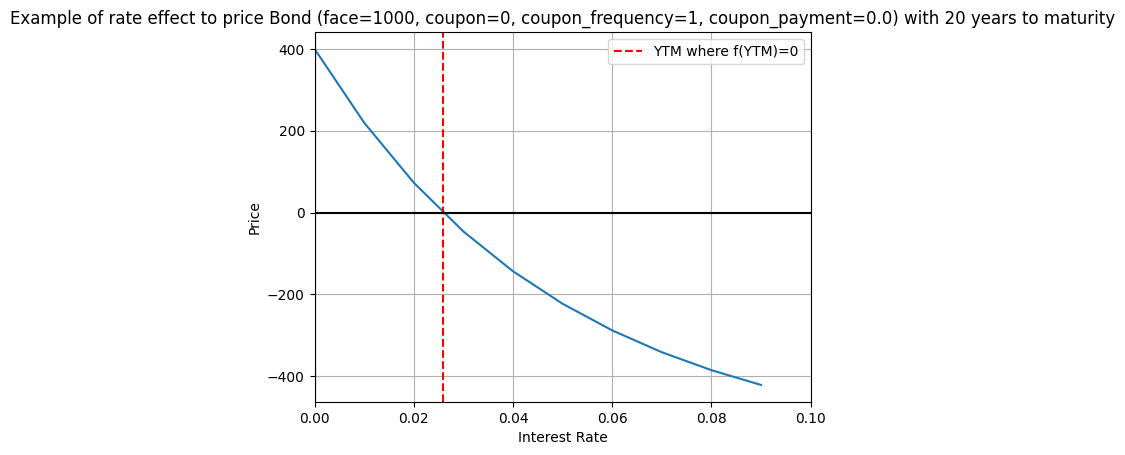

In [13]:
bnd = Bond(1000, 0)
price = 600
ir = [i/100 for i in range(10)]
years = 20

ytm = bnd.ytm_newton_raphson(price, years)
ytm_n = bnd.ytm_newton_raphson_numerical(price, years)

pvs = [bnd.pv(r, years)-price for r in ir]

p0 = 0
tangent0 = [bnd.pv(p0, years)-price + (r-p0)*bnd.pv_derivative(p0,years) for r in ir]

p1 = (p0-price) / bnd.pv_derivative(p0,years)
tangent1 = [bnd.pv(p1, years)-price + (r-p1)*bnd.pv_derivative(p1,years) for r in ir]

p2 = (p1-price) / bnd.pv_derivative(p0,years)
tangent2 = [bnd.pv(p2, years)-price + (r-p2)*bnd.pv_derivative(p2,years) for r in ir]


plt.plot(ir,pvs)
# plt.plot(ir, tangent0)
# plt.axvline(x=p1)
# plt.plot(ir, tangent2)
plt.axvline(x=ytm, color='r', linestyle='--', label='YTM where f(YTM)=0')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')

plt.grid(True)
plt.xlim(0, 0.1)

plt.title(f"Example of rate effect to price {bnd} with 20 years to maturity")
plt.xlabel("Interest Rate")
plt.ylabel("Price")
plt.legend()

display(ytm, ytm_n)
assert eq(bnd.pv(ytm, years),price)
assert eq(bnd.pv(ytm_n, years),price)


## Duration
Bond duration measures the sensitivity of a bond’s price to changes in interest rates, expressed in years. There are several types of duration, with Macaulay Duration and Modified Duration being the most common.

#### 1. Macaulay Duration
This is the weighted average time until a bondholder receives the bond's cash flows. It is calculated using the formula:
$$
D = \frac{\sum_{t=1}^N \frac{t \cdot C_t}{(1 + y)^t}}{\sum_{t=1}^N \frac{C_t}{(1 + y)^t}}
$$

where the last cashflow includes the face value 

#### 2. Modified Duration
This adjusts Macaulay Duration to measure a bond’s price sensitivity to interest rate changes. It is given by:
$$
D_{{mod}} = \frac{D}{1 + y}
$$

In [14]:
class BondWithDuration(Bond):
    def duration(self, ytm:float, years_to_maturity:int) -> float:
        total_periods = self.total_periods(years_to_maturity)
        periods = range(1, total_periods+1)
        discount_factors = [(1+ytm/self.freq)**-t for t in periods]
        present_values = [cf * df for cf, df in zip(self.cashflows(total_periods), discount_factors)]
        weighted_values = [pv * t for pv, t in zip(present_values, periods)]
        
        assert sum(present_values) == self.pv(ytm, years_to_maturity)
        macaulay_duration = sum(weighted_values)/sum(present_values)
        modified_duration = macaulay_duration / (1+ytm)
        return macaulay_duration, modified_duration
        
    def plot_duration(self, ytm:float, years_to_maturity:int) -> float:
        total_periods = self.total_periods(years_to_maturity)
        periods = range(1, total_periods+1)
        discount_factors = [(1+ytm/self.freq)**-t for t in periods]
        present_values = [cf * df for cf, df in zip(self.cashflows(total_periods), discount_factors)]
        weighted_values = [pv * t for pv, t in zip(present_values, periods)]
        pv = sum(present_values)

        assert pv == self.pv(ytm, years_to_maturity)
        macaulay_duration = sum(weighted_values)/pv
        modified_duration = macaulay_duration / (1+ytm)

        plt.bar(periods, self.cashflows(total_periods), label='cashflows')
        plt.bar(periods, present_values, color='orange', label=f"discounted cashflows based on rate = {rate}")
        plt.axvline(x=macaulay_duration, color='r', linestyle='--', label=f'Macaulay Duration: {macaulay_duration:.2f}' )
        plt.axvline(x=modified_duration, color='g', linestyle='--', label=f'Modified Duration: {modified_duration:.2f}' )
        plt.axhline(y=pv, color='orange', linestyle=':', label=f'PV: {pv:.2f}' )
        plt.grid(True)
        
        plt.title(f"Cashflows of {self}")
        plt.xlabel("Year")
        plt.ylabel("Cashflow")
        plt.legend(loc='upper left')
        
        return macaulay_duration, modified_duration

Text(0, 0.5, 'Price')

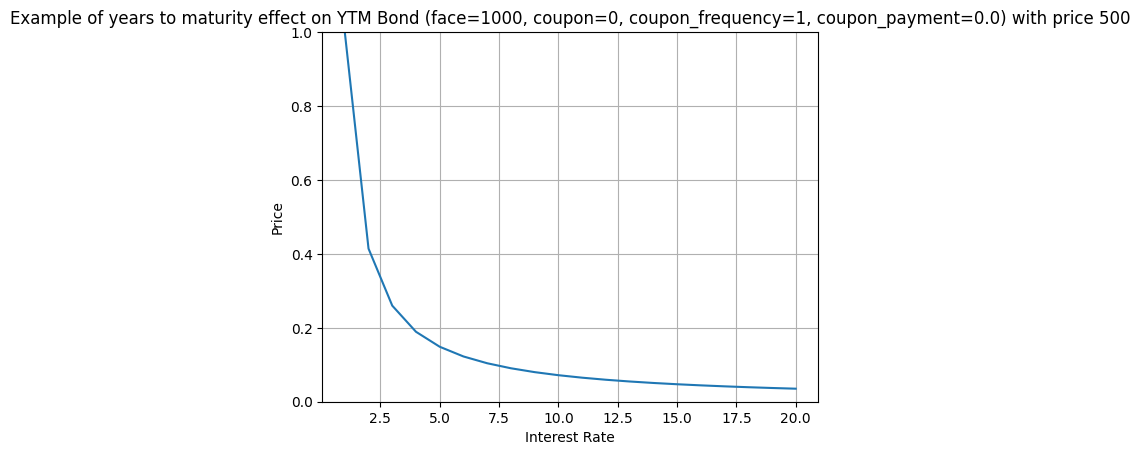

In [15]:
price = 500
years = range(1,21)
zeroBondD1 = BondWithDuration(1000)
ytms = [zeroBondD1.ytm_newton_raphson(price, t) for t in years]

plt.plot(years,ytms)
plt.grid(True)

plt.ylim(0, 1)

plt.title(f"Example of years to maturity effect on YTM {zeroBondD1} with price {price}")
plt.xlabel("Interest Rate")
plt.ylabel("Price")

### Examples

(10.0, 9.523809523809524)

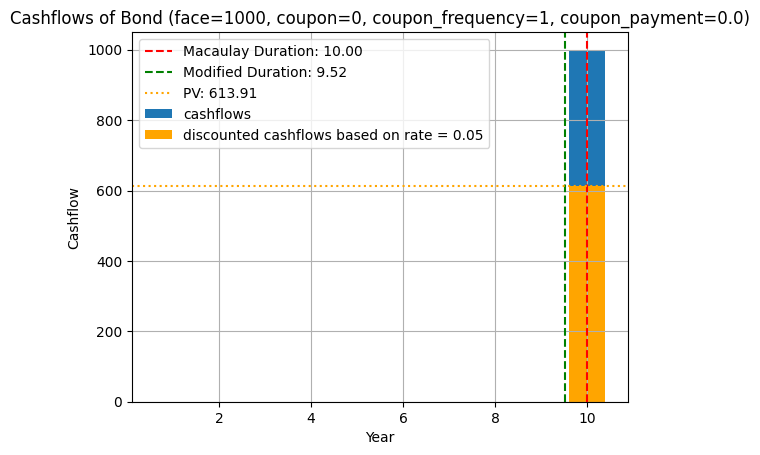

In [16]:
zeroBondD = BondWithDuration(1000)
years = 10
rate = 0.05
zeroBondD.plot_duration(rate, years)

(7.660862559509595, 6.964420508645086)

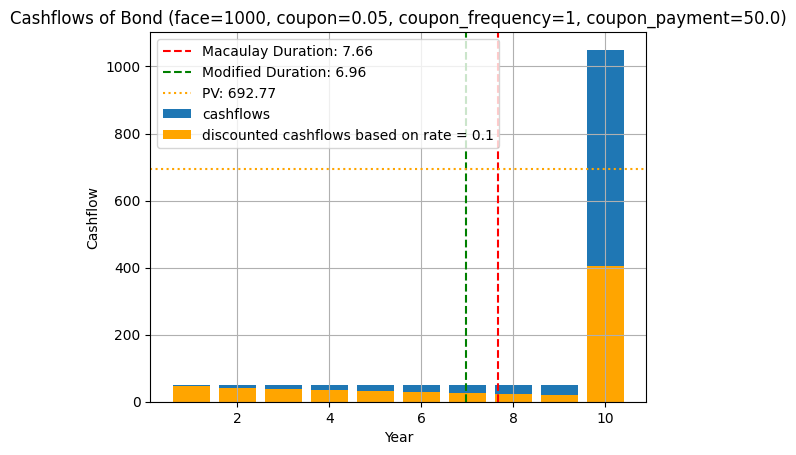

In [17]:
bondWithCoupon = BondWithDuration(1000,0.05)
years = 10
rate = 0.10
bondWithCoupon.plot_duration(rate, years)

(14.978043462206616, 13.61640314746056)

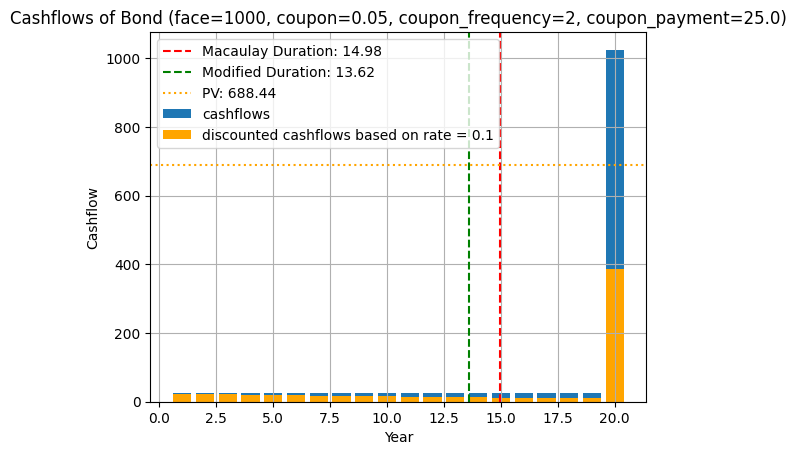

In [18]:
bondWithCoupon2 = BondWithDuration(1000,0.05,2)
years = 10
rate = 0.10
bondWithCoupon2.plot_duration(rate, years)

## Accrued Interest in Bond Pricing

Accrued interest is a crucial component in bond pricing when bonds are traded between coupon payment dates. It ensures the seller is compensated for the interest earned up to the sale date.

#### Key Concepts

1. **Clean Price vs. Dirty Price**:
   - **Clean Price**: The quoted price of the bond without accrued interest.
   - **Dirty Price**: The actual price paid, including accrued interest. This is the sum of the clean price and accrued interest.

2. **Accrued Interest Calculation**:
   Accrued interest is calculated as the proportion of the coupon payment that has accrued since the last coupon date.

   **Formula**:
   $$
   \text{Accrued Interest} = \text{Coupon Payment} \times \frac{\text{Days Since Last Coupon}}{\text{Days in Coupon Period}}
   $$
   - **Coupon Payment**: The periodic interest payment based on the bond's face value and coupon rate.
   - **Days Since Last Coupon**: The number of days between the last coupon payment and the settlement date.
   - **Days in Coupon Period**: The total number of days in the coupon period (from one coupon payment to the next).

3. **Dirty Price Formula**:
   $$
   \text{Dirty Price} = \text{Clean Price} + \text{Accrued Interest}
   $$

---

### Example

**Bond Details**:
- Face Value: \$1,000
- Coupon Rate: 6% annual, semi-annual payments (\$30 per period)
- Settlement Date: 90 days after the last coupon.
- Coupon Period: 180 days.

**Accrued Interest Calculation**:
$$
\text{Accrued Interest} = 30 \times \frac{90}{180} = 15
$$

**Dirty Price**:
If the clean price is \$980:
$$
\text{Dirty Price} = 980 + 15 = 995
$$

The buyer pays **\$995**, which includes \$15 to compensate the seller for accrued interest.

In [19]:
class BondWithAccrued(Bond):
    def dirty_price(self, ytm:float, years_to_maturity:int, days_after_last_coupon:int) -> float:
        return self.pv(ytm, years_to_maturity) + self.accrued_interest(days_after_last_coupon)
    def accrued_interest(self, days_after_last_coupon: int) -> float:
        return self.coupon_payment * days_after_last_coupon / (360/self.freq)

In [20]:
acc_bnd = BondWithAccrued(1000, 0.06, 2)
years = 5
price = 980
ytm = acc_bnd.ytm_newton_raphson(price, years_to_maturity=years)
acc_bnd.dirty_price(ytm, years, 90)

995.0028488239523

In [25]:
# TODO

## 
## Callable bonds
## Swaps

## Bootstrap yield curve

Given the equation to find the present value based on rates at different tenors

$$
P_1 =  \frac{C_1}{(1 + S_1)}
$$

$$
P_2 =  \frac{C_1}{(1 + S_1)} + \frac{C_2}{(1 + S_2)^2}
$$

$$
P_3 =  \frac{C_1}{(1 + S_1)} + \frac{C_2}{(1 + S_2)^2} + \frac{C_3}{(1 + S_3)^3}
$$

and given that $C_1$, $C_2$, $C_3$ are known coupons

and given that $S_1$, $S_2$ are known rates

we can then rearrange the equation and get $S_3$


$$
S_1 =  \frac{C_1}{P_1} - 1
$$

$$
S_2 = \left( \frac{C_2}{P_2 - \frac{C_1}{(1 + S_1)} } \right)^{\frac{1}{2}} - 1
$$

$$
S_3 = \left( \frac{C_3}{P_3 - \frac{C_1}{(1 + S_1)} - \frac{C_2}{(1 + S_2)^2}} \right)^{\frac{1}{3}} - 1
$$

In [137]:
# this works for zero but not for coupons
def build_yield_curve_from_prices(prices, years):
    if len(prices) != len(years):
        raise Exception("should be the same size")
    bond = Bond(1000,0)
    return [bond.ytm_newton_raphson(p,y) for p,y in zip(prices, years)]

In [138]:
def build_yield_curve_from_prices(prices, years):
    if len(prices) != len(years):
        raise Exception("should be the same size")
    bond = Bond(1000,0)
    s = []
    for p,y in zip(prices, years):
        c = bond.cashflows(y)
        c_last = c[-1]
        c = c[:-1]
        s_i = ( c_last / (p - sum([ c_i/(1+s_i[0])**s_i[1]  for c_i,s_i  in zip(c,s)])))  ** (1/y)  - 1
        s.append((s_i, y))
    return [ss[0] for ss in s] 

In [139]:
def build_zero_yield_curve_from_prices(prices, years):
    if len(prices) != len(years):
        raise Exception("should be the same size")
    bond = Bond(1000,0)
    s = []
    for p,y in zip(prices, years):
        c = bond.cashflows(y)
        c_last = c[-1]
        s_i = ( c_last / p )  ** (1/y)  - 1
        s.append((s_i, y))
    return [ss[0] for ss in s] 

In [140]:
z1y.cashflows(2)

[0.0, 1000.0]

In [141]:
# fake curve - constant yield
years = [1,2,3,4,5,10,15]
irs = [0.02] * len(years)

prices = [Bond(1000, 0).pv(r, y) for r, y in zip(irs, years)]
prices

[980.3921568627451,
 961.1687812379853,
 942.3223345470445,
 923.8454260265142,
 905.7308098299159,
 820.3482998751551,
 743.0147299885189]

In [142]:
# output should match input
irs_out = build_yield_curve_from_prices(prices, years)
display(irs_out)
assert all([eq(r,ro) for r,ro in zip(irs, irs_out)])

[0.020000000000000018,
 0.020000000000000018,
 0.020000000000000018,
 0.020000000000000018,
 0.020000000000000018,
 0.020000000000000018,
 0.020000000000000018]

In [143]:
# more complex curve
years = [1,2,3,4,5,10,15]
irs = [0.001, 0.02, 0.04, 0.035, 0.08, 0.045, 0.06]

prices = [Bond(1000, 0).pv(r, y) for r, y in zip(irs, years)]
prices

[999.0009990009992,
 961.1687812379853,
 888.9963586709148,
 871.4422276985724,
 680.5831970337529,
 643.9276820300429,
 417.2650607355405]

In [144]:
# output should match input
irs_out = build_yield_curve_from_prices(prices, years)
display(irs_out)
assert all([eq(r,ro) for r,ro in zip(irs, irs_out)])

[0.0009999999999998899,
 0.020000000000000018,
 0.040000000000000036,
 0.03499999999999992,
 0.08000000000000007,
 0.04499999999999993,
 0.06000000000000005]